# Practical 3: Gradient descent

## Preliminary

First import the all libraries

In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rd
import scipy as sc
import matplotlib.pyplot as plt

Let
$$ f(x_1, x_2) = 5\,x_1^2 + x_2^4 + \exp (x_1 + 0.5 \, x_2) $$

In [2]:
def f(x: np.ndarray):
    x1 = x[0]
    x2 = x[1]
    return 5 * x1**2 + x2**4 + np.exp(x1 + 0.5 * x2)

In [3]:
x = np.array([0.3, 0.2])
f(x)

1.9434246976412703


The partials derivatives read
$$ \frac{\partial f}{\partial x_1} = 10 \, x_1 + \exp(x_1 + 0.5 \, x_2) $$
and
$$ \frac{\partial f}{\partial x_2} = 4 \, x_2^3 + 0.5 \cdot \exp(x_1 + 0.5 \, x_2) $$

In [4]:
def f_grad(x: np.ndarray):
    x1 = x[0]
    x2 = x[1]
    
    # Let's compute the partial derivatives individually
    df_dx1 = 10 * x1 + np.exp(x1 + 0.5 * x2)
    df_dx2 = 4 * x2 ** 3 + 0.5 * np.exp(x1 + 0.5 * x2)

    gradient = np.array([df_dx1, df_dx2])
    
    return gradient

In [5]:
x = np.array([0.3, 0.2])
f_grad(x)

array([4.4918247 , 0.77791235])

**Note**: In modern Deep Learning frameworks (e.g., `pytorch, tensorflow, jax`), the gradients are *automatically* computed for you. Hence, you only implement the function `f` and the framework computes `f_grad` for you!

This is called *automatic differentiation* (autodiff).

Plot $f$ in a 3D Plot

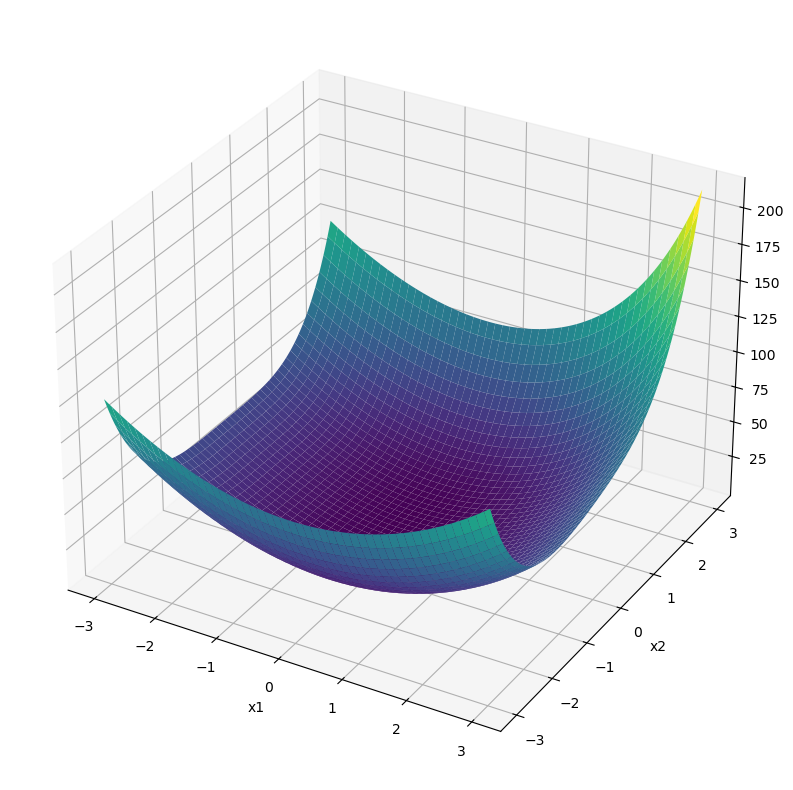

In [6]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

N = 200
x1 = np.linspace(-3, 3, N)
th1 = np.linspace(-3, 3, N)
xx1, xx2 = np.meshgrid(x1, th1)
ff = np.zeros(xx1.shape)

# note: there are much more efficient ways of doing this, but we keep it simple here
for i in range(N):
    for j in range(N):
        x1_ = xx1[i,j]
        x2_ = xx2[i,j]
        ff[i,j] = f([x1_, x2_])

ax.plot_surface(xx1, xx2, ff, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')

plt.show()

## Sanity-check the gradient

Let's sample $\mathbf{x} = (x_1, x_2)^T$ from a 2D Standard Gaussian:
$$\mathbf{x} \sim \mathcal{N}(\mathbf{0}, I)$$
i.e., the mean is $\mu = (0, 0)^T$ and the covariance matrix is the identity matrix.

This is identical to independently sampling $x_1$ and $x_2$ from 1D Standard Gaussians: 
$$x_1 \sim \mathcal{N}(0, 1) \qquad \text{and } \ x_2 \sim \mathcal{N}(0, 1)$$

In [7]:
from scipy.optimize import check_grad

x = np.random.randn(2) # x is a sample from a 2D Standard Gaussian
x

array([-1.02957012,  0.29277122])

In [8]:
check_grad(f, f_grad, x) # Think about what this does internally

1.420924486863236e-07

# Implement gradient descent

One iteration of gradient descent is performed with the formula:
$$ \mathbf{x}^{(t+1)} \gets \mathbf{x}^{(t)} - \eta_t \nabla f(\mathbf{x}^{(t)}) $$

In [9]:
from gd import gradient_descent

x = np.random.randn(2) # x is a sample from a 2D Standard Gaussian
x_star, f_list = gradient_descent(f, f_grad, x_init=x, learning_rate=0.1, num_iters=100)
x_star

ModuleNotFoundError: No module named 'gd'

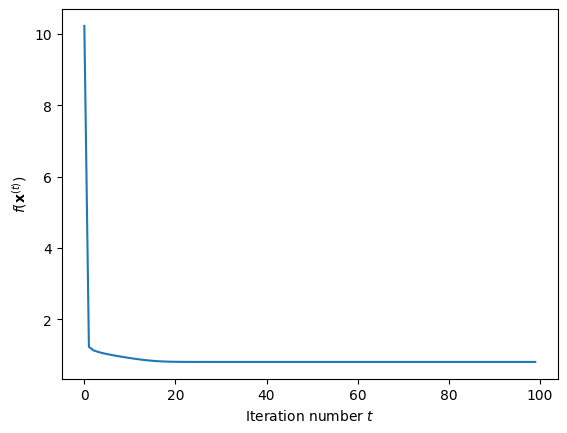

In [31]:
plt.plot(f_list)
plt.xlabel(r'Iteration number $t$')
plt.ylabel(r'$f(\mathbf{x}^{(t)})$')
plt.show()

In [13]:
f(x_star)

0.8099381237684057